# Market Research for Business Growth: Customer Behavior Analysis for a Garment Company in Bandung

Proyek ini dirancang untuk mendukung peningkatan penjualan e-commerce pada sebuah perusahaan garmen di Bandung. Walaupun telah memiliki banyak pelanggan, perusahaan masih kesulitan dalam memahami kebiasaan dan preferensi belanja mereka. Untuk itu, dilakukan analisis data pelanggan dan transaksi menggunakan pendekatan data mining seperti clustering, decision tree, dan association rule mining guna merumuskan strategi pemasaran yang lebih tepat sasaran. Untuk menyusun strategi pemasaran yang efektif, perusahaan mengumpulkan data karakteristik pelanggan, pola belanja, dan keputusan pembelian. Pada tahun 2023, diperoleh 15.000 data pelanggan dan 20.000 data transaksi. Data dianalisis berdasarkan output random number generation di Microsoft Excel .

## DATA PREPARATION
Langkah ini merupakan proses awal persiapan data agar bisa dianalisis dengan baik. Dalam hal ini kita dapat mengumpulkan, menggabungkan, dan memahami data sebelum proses analisis lebih lanjut. 
### 1. Data Pelanggan

In [1]:
import pandas as pd

DataPelanggan = pd.read_excel("D:/-- Data dari C --/Documents/iqi/after study/GITHUB/Garment Company.xlsx", 
                              sheet_name = 'Data Pelanggan')
DataPelanggan = pd.DataFrame(DataPelanggan)

In [2]:
print('Lima data teratas:')
DataPelanggan.head()

Lima data teratas:


,ID Pelanggan,Total Pembelian,Jarak Pengiriman
0,1,458155.370274,164.020749
1,2,350723.696050,109.824801
2,3,77004.899089,118.240787
3,4,116982.307140,29.621374
4,5,260973.963072,166.402283


In [3]:
print('\nInfo dataset')
print(DataPelanggan.info())


Info dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID Pelanggan      15000 non-null  int64  
 1   Total Pembelian   15000 non-null  float64
 2   Jarak Pengiriman  15000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB
None


In [4]:
print('\nEksplorasi Data Pelanggan')
print(DataPelanggan.describe())


Eksplorasi Data Pelanggan
       ID Pelanggan  Total Pembelian  Jarak Pengiriman
count  15000.000000     1.500000e+04      15000.000000
mean    7500.500000     2.553868e+05        122.086169
std     4330.271354     1.388278e+05         65.050936
min        1.000000     1.358267e+02          0.004907
25%     3750.750000     1.523605e+05         73.263637
50%     7500.500000     2.486575e+05        119.531468
75%    11250.250000     3.515266e+05        166.330581
max    15000.000000     1.180511e+06        547.572021


### 2. Data Pola Keputusan Pembelian

In [5]:
KeputusanPembelian = pd.read_excel("D:/-- Data dari C --/Documents/iqi/after study/GITHUB/Garment Company.xlsx", 
                              sheet_name = 'Pola Keputusan Pembelian')
KeputusanPembelian = pd.DataFrame(KeputusanPembelian)

In [6]:
print('Lima data teratas:')
KeputusanPembelian.head()

Lima data teratas:


,ID Pelanggan,Kualitas Produk,Kualitas Informasi Produk,Jenis Pengiriman,Ongkos Kirim,Rating,Metode Pembayaran,Status
0,1,1,0,1,0,1,1,0
1,2,1,0,1,0,0,1,0
2,3,1,1,1,0,1,1,0
3,4,1,1,1,0,1,1,0
4,5,1,1,1,1,1,1,0


In [7]:
print('\nInfo dataset')
print(KeputusanPembelian.info())


Info dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID Pelanggan               15000 non-null  int64
 1   Kualitas Produk            15000 non-null  int64
 2   Kualitas Informasi Produk  15000 non-null  int64
 3   Jenis Pengiriman           15000 non-null  int64
 4   Ongkos Kirim               15000 non-null  int64
 5   Rating                     15000 non-null  int64
 6   Metode Pembayaran          15000 non-null  int64
 7   Status                     15000 non-null  int64
dtypes: int64(8)
memory usage: 937.6 KB
None


In [8]:
print('\nEksplorasi Data Pola Keputusan Pembelian')
print(KeputusanPembelian.describe())


Eksplorasi Data Pola Keputusan Pembelian
       ID Pelanggan  Kualitas Produk  Kualitas Informasi Produk  \
count  15000.000000     15000.000000               15000.000000   
mean    7500.500000         0.598400                   0.704333   
std     4330.271354         0.490238                   0.456357   
min        1.000000         0.000000                   0.000000   
25%     3750.750000         0.000000                   0.000000   
50%     7500.500000         1.000000                   1.000000   
75%    11250.250000         1.000000                   1.000000   
max    15000.000000         1.000000                   1.000000   

       Jenis Pengiriman  Ongkos Kirim        Rating  Metode Pembayaran  \
count      15000.000000  15000.000000  15000.000000       15000.000000   
mean           0.403400      0.198867      0.796267           0.898467   
std            0.490596      0.399161      0.402786           0.302044   
min            0.000000      0.000000      0.000000       

### 3. Data Transaksi Pembelian Produk

In [9]:
TransaksiPembelian = pd.read_excel("D:/-- Data dari C --/Documents/iqi/after study/GITHUB/Garment Company.xlsx", 
                              sheet_name = 'Transaksi Pembelian Produk')
TransaksiPembelian = pd.DataFrame(TransaksiPembelian)

In [10]:
print('Lima data teratas:')
TransaksiPembelian.head()

Lima data teratas:


,Jeans,T-Shirt,Jaket,Sweater,Kemeja,Blouse,Batik,Rok,Topi,Tas,Dompet,Blazer,Jas,Dress,Celana Bahan,Dasi,Sabuk
0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0
2,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,0
3,1,0,1,0,0,1,0,1,1,1,0,1,0,1,0,1,0
4,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1


In [11]:
print('\nInfo dataset')
print(TransaksiPembelian.info())


Info dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Jeans         20000 non-null  int64
 1   T-Shirt       20000 non-null  int64
 2   Jaket         20000 non-null  int64
 3   Sweater       20000 non-null  int64
 4   Kemeja        20000 non-null  int64
 5   Blouse        20000 non-null  int64
 6   Batik         20000 non-null  int64
 7   Rok           20000 non-null  int64
 8   Topi          20000 non-null  int64
 9   Tas           20000 non-null  int64
 10  Dompet        20000 non-null  int64
 11  Blazer        20000 non-null  int64
 12  Jas           20000 non-null  int64
 13  Dress         20000 non-null  int64
 14  Celana Bahan  20000 non-null  int64
 15  Dasi          20000 non-null  int64
 16  Sabuk         20000 non-null  int64
dtypes: int64(17)
memory usage: 2.6 MB
None


In [12]:
print('\nEksplorasi Data Transaksi Pembelian Produk')
print(TransaksiPembelian.describe())


Eksplorasi Data Transaksi Pembelian Produk
             Jeans       T-Shirt         Jaket       Sweater        Kemeja  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       0.60010      0.602650      0.600550      0.598000      0.604650   
std        0.48989      0.489362      0.489798      0.490314      0.488938   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        0.00000      0.000000      0.000000      0.000000      0.000000   
50%        1.00000      1.000000      1.000000      1.000000      1.000000   
75%        1.00000      1.000000      1.000000      1.000000      1.000000   
max        1.00000      1.000000      1.000000      1.000000      1.000000   

             Blouse         Batik           Rok          Topi           Tas  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       0.596850      0.594500      0.599150      0.598750      0.602750   
std        0.490

## DATA CLEANING
Langkah ini merupakan proses untuk menghilangkan 'noise' atau gangguan pada data agar tidak mengganggu proses analisis. Dalam kasus ini saya mengubah variabel kategori dengan nilai 0 dan 1 menjadi label yang deskriptif (ordinal).
### 1. Keputusan Pembelian

In [13]:
KeputusanPembelian['Kualitas Produk'] = KeputusanPembelian['Kualitas Produk'].replace({0: 'Buruk', 1: 'Baik'})
KP_counts = KeputusanPembelian[['Kualitas Produk']].value_counts()
print(KP_counts)

Kualitas Produk
Baik               8976
Buruk              6024
Name: count, dtype: int64


In [14]:
KeputusanPembelian['Kualitas Informasi Produk'] = KeputusanPembelian['Kualitas Informasi Produk'].replace(
    {0: 'Informasi Produk Tidak Jelas', 1: 'Informasi Produk Jelas'})
KIP_counts = KeputusanPembelian[['Kualitas Informasi Produk']].value_counts()
print(KIP_counts)

Kualitas Informasi Produk   
Informasi Produk Jelas          10565
Informasi Produk Tidak Jelas     4435
Name: count, dtype: int64


In [15]:
KeputusanPembelian['Jenis Pengiriman'] = KeputusanPembelian['Jenis Pengiriman'].replace(
    {0: 'Luar Provinsi Jawa Barat', 1: 'Dalam Provinsi Jawa Barat'})
JP_counts = KeputusanPembelian[['Jenis Pengiriman']].value_counts()
print(JP_counts)

Jenis Pengiriman         
Luar Provinsi Jawa Barat     8949
Dalam Provinsi Jawa Barat    6051
Name: count, dtype: int64


In [16]:
KeputusanPembelian['Ongkos Kirim'] = KeputusanPembelian['Ongkos Kirim'].replace({0: 'Gratis', 1: 'Berbayar'})
OK_counts = KeputusanPembelian[['Ongkos Kirim']].value_counts()
print(OK_counts)

Ongkos Kirim
Gratis          12017
Berbayar         2983
Name: count, dtype: int64


In [17]:
KeputusanPembelian['Rating'] = KeputusanPembelian['Rating'].replace({0: 'Buruk', 1: 'Baik'})
R_counts = KeputusanPembelian[['Rating']].value_counts()
print(R_counts)

Rating
Baik      11944
Buruk      3056
Name: count, dtype: int64


In [18]:
KeputusanPembelian['Metode Pembayaran'] = KeputusanPembelian['Metode Pembayaran'].replace(
    {0: 'Cash on Delivery (COD)', 1: 'Sistem Pembayaran Online'})
MP_counts = KeputusanPembelian[['Metode Pembayaran']].value_counts()
print(MP_counts)

Metode Pembayaran       
Sistem Pembayaran Online    13477
Cash on Delivery (COD)       1523
Name: count, dtype: int64


In [19]:
KeputusanPembelian['Status'] = KeputusanPembelian['Status'].replace({0: 'Tidak Membeli', 1: 'Membeli'})
S_counts = KeputusanPembelian[['Status']].value_counts()
print(S_counts)

Status       
Tidak Membeli    7570
Membeli          7430
Name: count, dtype: int64


### Transaksi Pembelian Produk

In [20]:
TransaksiPembelian = TransaksiPembelian.replace({0: 'Tidak Membeli', 1: 'Membeli'})
print(TransaksiPembelian)

               Jeans        T-Shirt          Jaket        Sweater  \
0      Tidak Membeli        Membeli  Tidak Membeli        Membeli   
1      Tidak Membeli        Membeli  Tidak Membeli  Tidak Membeli   
2            Membeli  Tidak Membeli        Membeli  Tidak Membeli   
3            Membeli  Tidak Membeli        Membeli  Tidak Membeli   
4      Tidak Membeli  Tidak Membeli        Membeli        Membeli   
...              ...            ...            ...            ...   
19995        Membeli        Membeli        Membeli  Tidak Membeli   
19996        Membeli        Membeli        Membeli  Tidak Membeli   
19997        Membeli        Membeli        Membeli        Membeli   
19998        Membeli  Tidak Membeli  Tidak Membeli        Membeli   
19999        Membeli  Tidak Membeli        Membeli        Membeli   

              Kemeja         Blouse          Batik            Rok  \
0            Membeli        Membeli  Tidak Membeli        Membeli   
1            Membeli  Tidak Membe

## EXPLORATORY DATA ANALYSIS 
EDA (Exploratory Data Analysis) merupakan langkah awal dalam analisis data yang bertujuan untuk memahami karakteristik data, menemukan pola, tren, atau outlier. Dalam kasus ini EDA digunakan untuk memahami distribusi dan pola perilaku pelanggan. Eksplorasi awal dilakukan guna mengidentifikasi tren utama yang dapat menjadi dasar pengambilan keputusan.
### 1.  Data Pelanggan

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

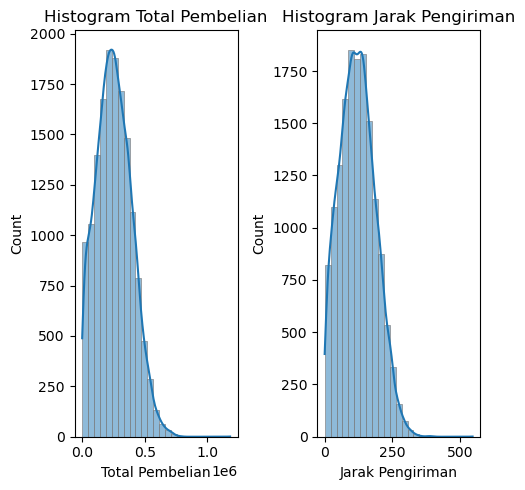

In [22]:
plt.figure(figsize = (5, 5))

plt.subplot(1, 2, 1)
sns.histplot(DataPelanggan['Total Pembelian'], bins = 25, kde = True, edgecolor='grey')
plt.title('Histogram Total Pembelian')

# Visualisasi Total Pembelian
plt.subplot(1, 2, 2)
sns.histplot(DataPelanggan['Jarak Pengiriman'], bins = 25, kde = True, edgecolor='grey')
plt.title('Histogram Jarak Pengiriman')

plt.tight_layout()
plt.show()

### 2. Pola Keputusan Pembelian

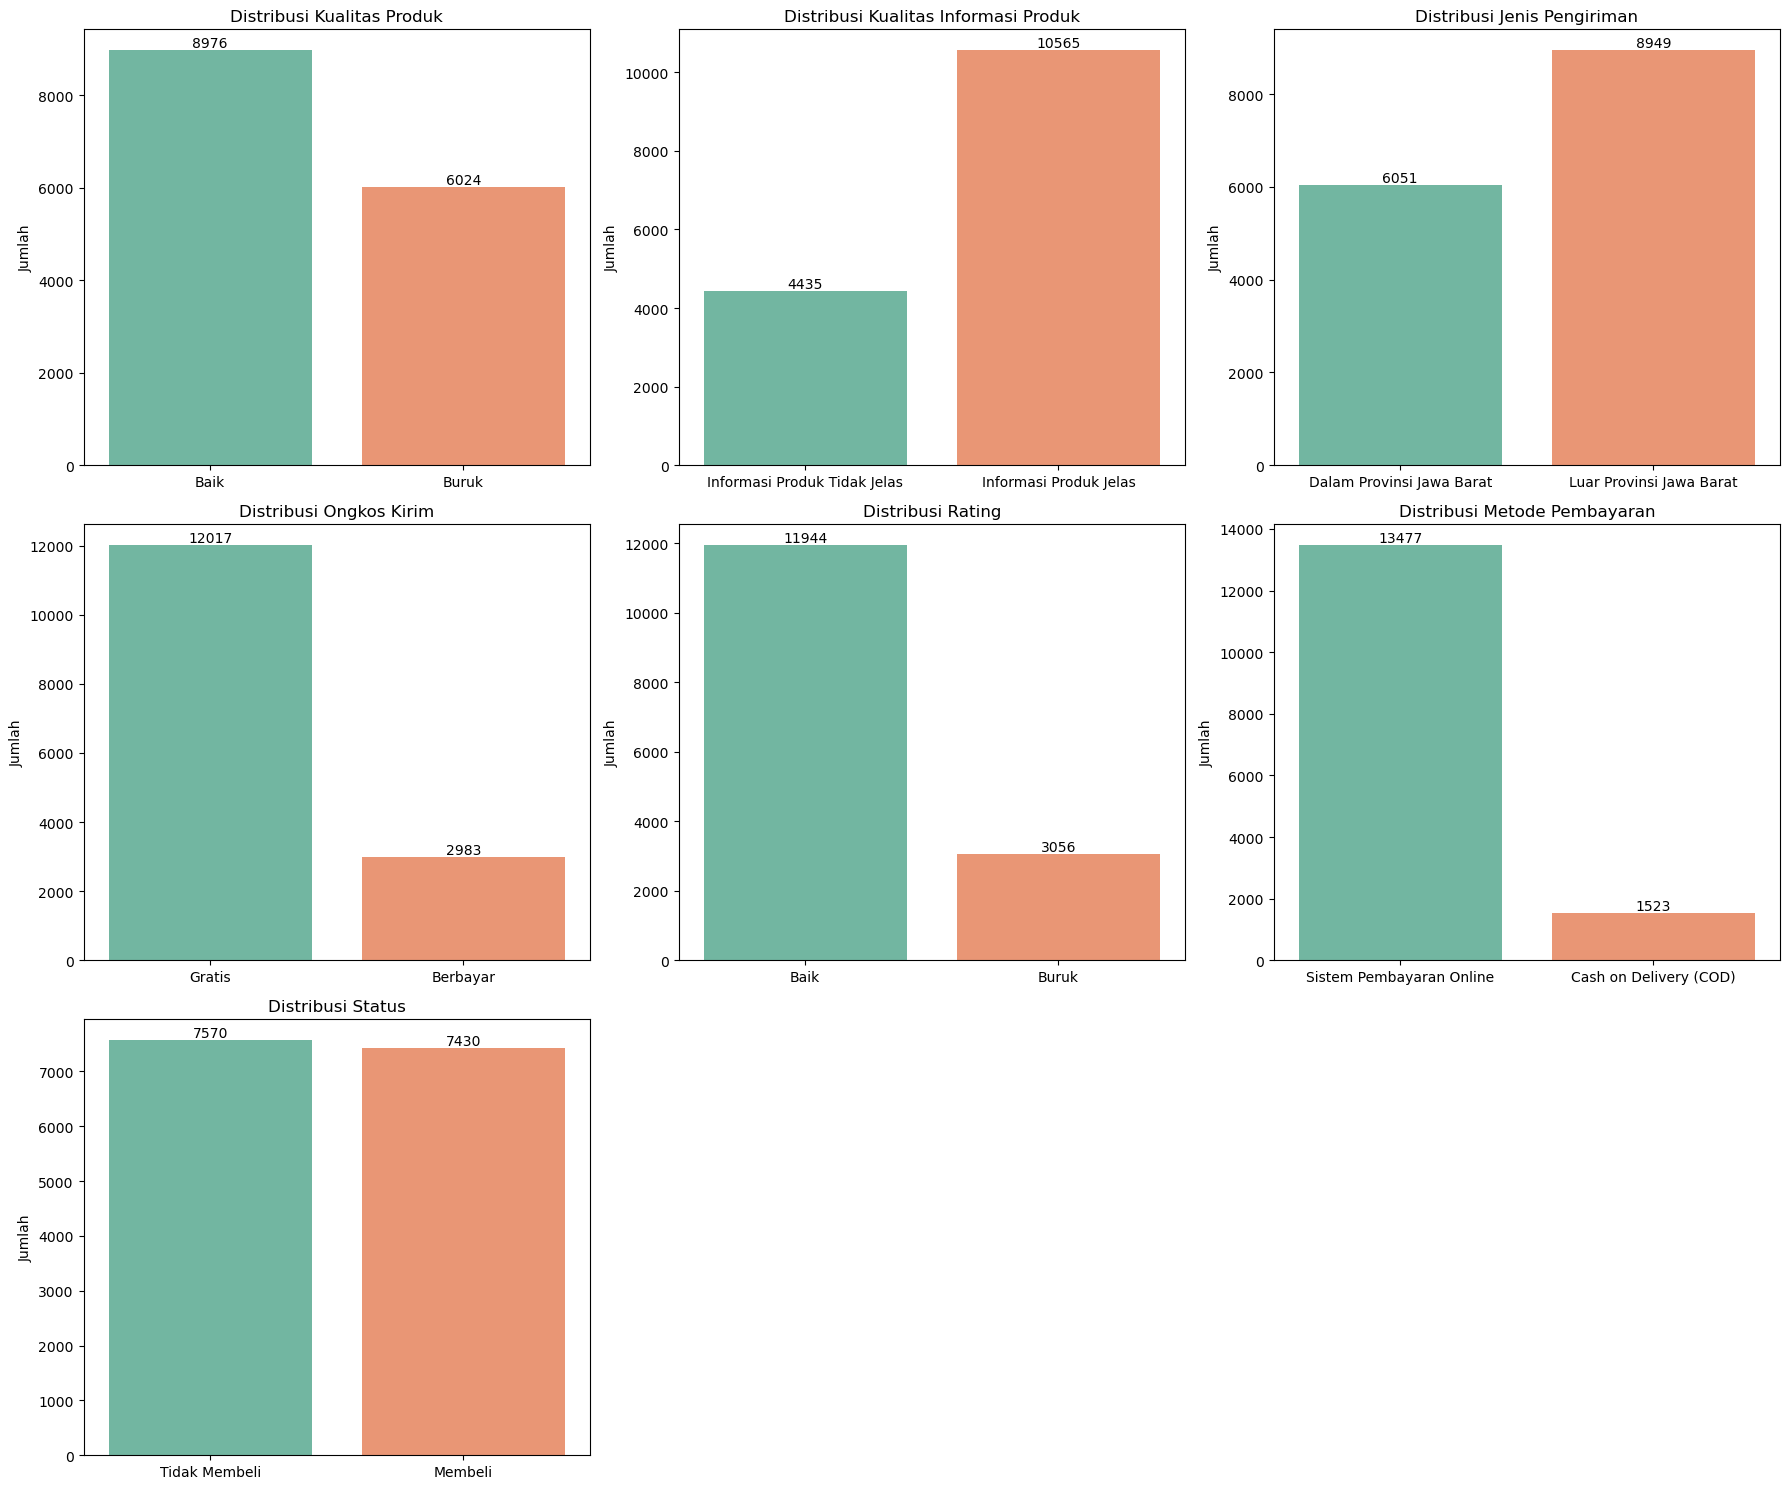

In [23]:
# Variabel yang akan di plot
variabels_1 = ["Kualitas Produk", "Kualitas Informasi Produk", "Jenis Pengiriman", "Ongkos Kirim", "Rating", 
               "Metode Pembayaran", "Status"]

# Membuat subplots menjadi 3x3 (3 baris x 3 kolom)
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize = (18, 15))
axes = axes.flatten()

# Loop untuk membuat barplot
for i, var in enumerate(variabels_1):
    if var in KeputusanPembelian.columns:  # Pastikan variabel ada di DataFrame
        ax = axes[i]  # Ambil subplot yang sesuai

        # Buat barplot dengan warna yang sesuai
        plot = sns.countplot(data = KeputusanPembelian, x = var, ax = ax, palette = "Set2")
        ax.set_title(f"Distribusi {var}")
        ax.set_xlabel("")
        ax.set_ylabel("Jumlah")
        ax.tick_params(axis = "x", rotation = 0)

# Menambahkan angka di atas setiap batang
        for p in plot.patches:  # Loop untuk setiap batang (bar) dalam subplot ini
            height = p.get_height()
            if height > 0:  # Pastikan batang memiliki nilai
                ax.annotate(f"{int(height)}",
                            (p.get_x() + p.get_width() / 2, height),
                            ha = "center", va = "bottom", fontsize = 10, color = "black")
    
# Menghapus subplot kosong jika jumlah variabel kurang dari jumlah grid
for j in range(len(variabels_1), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 3. Transaksi Pembelian Produk

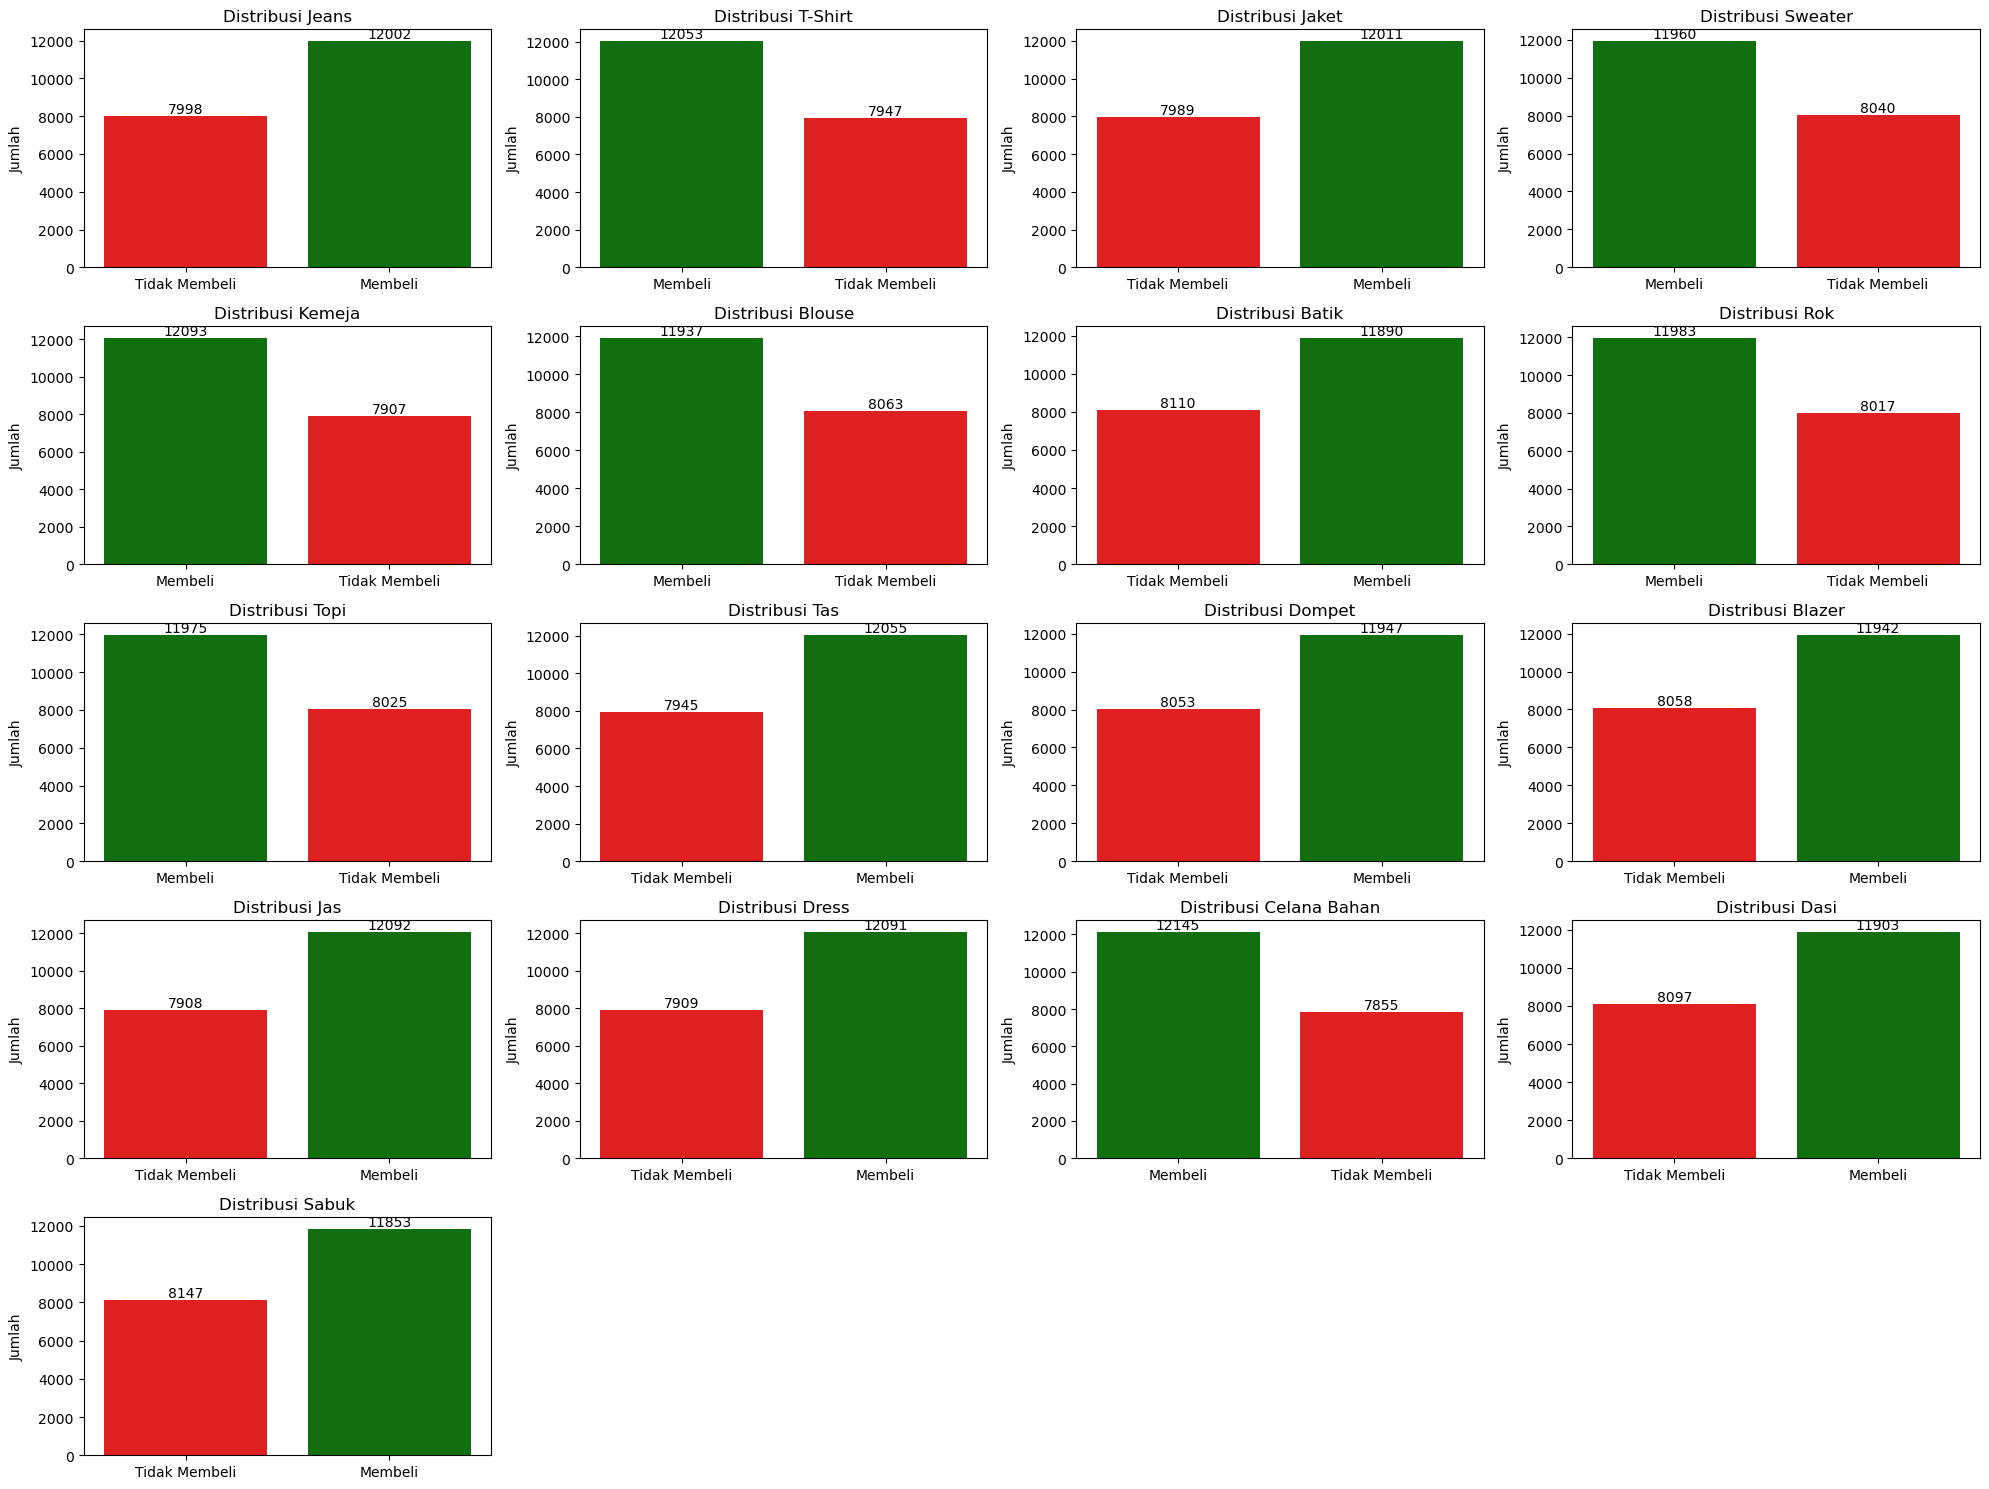

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variabel yang akan di plot
variabels_2 = ["Jeans", "T-Shirt", "Jaket", "Sweater", "Kemeja", "Blouse", "Batik", "Rok", "Topi", "Tas", "Dompet", 
               "Blazer", "Jas", "Dress", "Celana Bahan", "Dasi", "Sabuk"]

# Membuat subplots menjadi 5x4
rows, cols = 5, 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

# Loop untuk membuat barplot
for i, var in enumerate(variabels_2):
    if var in TransaksiPembelian.columns:  # Pastikan variabel ada di DataFrame
        ax = axes[i]  # Ambil subplot yang sesuai

        # Buat barplot dengan warna yang sesuai
        plot = sns.countplot(data = TransaksiPembelian, x = var, ax = ax, palette ={"Membeli": "green", "Tidak Membeli": "red"})
        ax.set_title(f"Distribusi {var}")
        ax.set_xlabel("")
        ax.set_ylabel("Jumlah")
        ax.tick_params(axis = "x", rotation = 0)

        # Tambahkan angka di atas setiap batang
        for p in plot.patches:
            height = p.get_height()
            if height > 0:  # Pastikan nilai ada
                ax.annotate(f"{int(height)}",
                            (p.get_x() + p.get_width() / 2, height),
                            ha = "center", va = "bottom", fontsize = 10, color="black")

# Menghapus subplot kosong jika jumlah variabel kurang dari jumlah grid
for j in range(len(variabels_2), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 3. Modelling
### 3.1 Data Pelanggan

In [26]:
# Membuat kategori berdasarkan kuartil dari total pembelian
DataPelanggan['Total Pembelian Kategori'] = pd.qcut(DataPelanggan['Total Pembelian'], 
                                            q = [0, 0.25, 0.5, 0.75, 1], labels = ['Q1', 'Q2', 'Q3', 'Q4'])

# Membuat kategori berdasarkan kuartil dari jarak pengiriman
DataPelanggan['Jarak Pengiriman Kategori'] = pd.qcut(DataPelanggan['Jarak Pengiriman'], 
                                             q=[0, 0.25, 0.5, 0.75, 1], labels = ['Q1', 'Q2', 'Q3', 'Q4'])

# Menampilkan data menggunakan kategori
print(DataPelanggan[['ID Pelanggan', 'Total Pembelian', 'Jarak Pengiriman',
                     'Total Pembelian Kategori', 'Jarak Pengiriman Kategori']])

       ID Pelanggan  Total Pembelian  Jarak Pengiriman  \
0                 1    458155.370274        164.020749   
1                 2    350723.696050        109.824801   
2                 3     77004.899089        118.240787   
3                 4    116982.307140         29.621374   
4                 5    260973.963072        166.402283   
...             ...              ...               ...   
14995         14996    183594.153845         63.104115   
14996         14997    294830.699153        183.581069   
14997         14998    326131.527749        192.504940   
14998         14999    705722.329207        109.592027   
14999         15000    440850.641957         82.514903   

      Total Pembelian Kategori Jarak Pengiriman Kategori  
0                           Q4                        Q3  
1                           Q3                        Q2  
2                           Q1                        Q2  
3                           Q1                        Q1  
4       

In [27]:
# Analisis karakteristik masing-masing kelompok
Data_Grup = DataPelanggan.groupby(['Total Pembelian Kategori', 'Jarak Pengiriman Kategori']).size().unstack(fill_value = 0)
print("\nJumlah Pelanggan pada Setiap Kategori adalah")
print(Data_Grup)


Jumlah Pelanggan pada Setiap Kategori adalah
Jarak Pengiriman Kategori   Q1   Q2   Q3   Q4
Total Pembelian Kategori                     
Q1                         968  911  915  957
Q2                         938  923  947  941
Q3                         945  960  907  938
Q4                         900  955  981  914


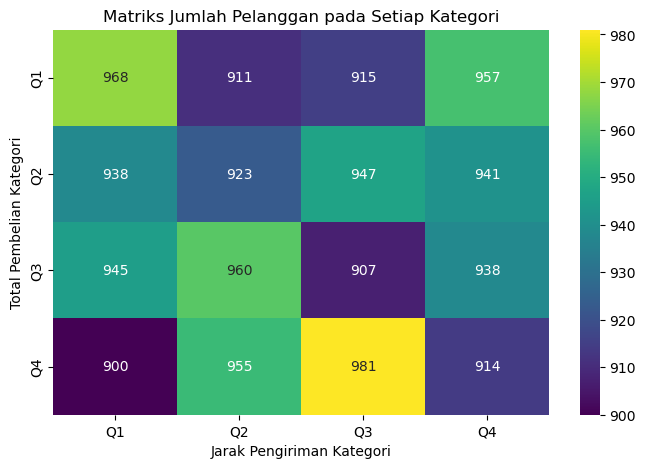

In [29]:
# Visualisasi matriks jumlah pelanggan pada setiap kategori
plt.figure(figsize = (8, 5))
sns.heatmap(Data_Grup, annot = True, cmap = 'viridis', fmt = 'g')
plt.title('Matriks Jumlah Pelanggan pada Setiap Kategori')
plt.xlabel('Jarak Pengiriman Kategori')
plt.ylabel('Total Pembelian Kategori')
plt.show()

In [30]:
# Membuat dataframe dari variabel Total Pembelian dan Jarak Pengiriman
X = DataPelanggan.iloc[:, 1:3]
X.head()

,Total Pembelian,Jarak Pengiriman
0,458155.370274,164.020749
1,350723.696050,109.824801
2,77004.899089,118.240787
3,116982.307140,29.621374
4,260973.963072,166.402283


In [31]:
# Memeriksa Ukuran dari dataframe
X.shape

(15000, 2)

In [32]:
# Memeriksa apakah ada missing data atau tidak
X.isnull().sum()

Total Pembelian     0
Jarak Pengiriman    0
dtype: int64

In [33]:
# Menampilkan deskripsi dari dataframe X
print(X.describe())

       Total Pembelian  Jarak Pengiriman
count     1.500000e+04      15000.000000
mean      2.553868e+05        122.086169
std       1.388278e+05         65.050936
min       1.358267e+02          0.004907
25%       1.523605e+05         73.263637
50%       2.486575e+05        119.531468
75%       3.515266e+05        166.330581
max       1.180511e+06        547.572021


#### Dengan memperhatikan nilai dari WITHIN CLUSTER SUM OF SQUARES kita dapat menentukan banyak cluster yang akan dibuat

In [36]:
from sklearn.cluster import KMeans

WCSS = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 14)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

#### Membuat garis antara WCSS dengan banyaknya cluster (elbow method)

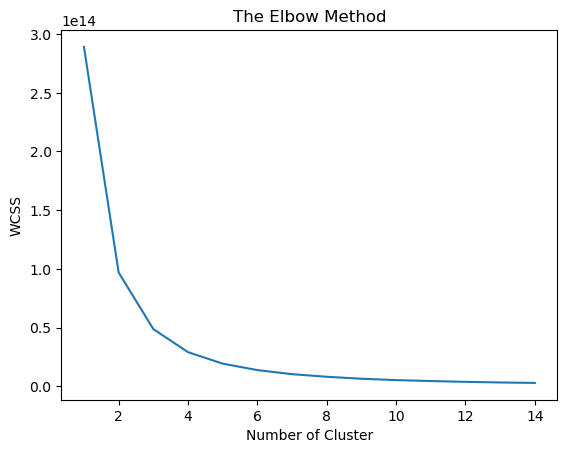

In [37]:
plt.plot(range(1, 15), WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

Kita bisa melihat bahwa garis melandai pada cluster keempat, yang berarti terdapat sebanyak 4 cluster

#### Mendefinisikan model sebanyak 4 cluster

In [38]:
kmeans = KMeans(n_clusters = 4, random_state=14)
kmeans.fit(X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=14)

In [39]:
kmeans.labels_

array([2, 0, 1, ..., 0, 2, 2])

In [40]:
y_pred = kmeans.fit_predict(X)
y_pred

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 0, 1, ..., 0, 2, 2])

#### Membuat kolom "cluster" dengan menggabungkan label cluster ke dataframe

In [41]:
hasil_kmeans = X.copy()
hasil_kmeans["Cluster"] = kmeans.labels_
hasil_kmeans.head()

,Total Pembelian,Jarak Pengiriman,Cluster
0,458155.370274,164.020749,2
1,350723.696050,109.824801,0
2,77004.899089,118.240787,1
3,116982.307140,29.621374,1
4,260973.963072,166.402283,3


In [42]:
# Nilai untuk sumbu X dan Y
# indeks = 0,1,2,3, karena k = 4
cluster_x = hasil_kmeans["Cluster"].value_counts().index   

# Frekuensi
cluster_y = hasil_kmeans["Cluster"].value_counts().values  

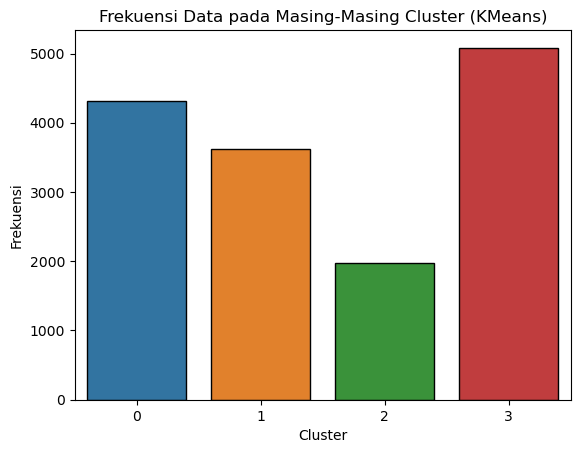

In [43]:
# Visualisasi
sns.barplot(x = cluster_x , y = cluster_y, edgecolor = 'black')
plt.title("Frekuensi Data pada Masing-Masing Cluster (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")
plt.show()

In [45]:
import numpy as np
Frek_cluster = np.bincount(kmeans.labels_)
Frek_cluster

array([4312, 3625, 1979, 5084], dtype=int64)

In [46]:
ann_kmeans0   = hasil_kmeans[hasil_kmeans["Cluster"] == 0].iloc[:, 0]
spend_kmeans0 = hasil_kmeans[hasil_kmeans["Cluster"] == 0].iloc[:, 1]

ann_kmeans1   = hasil_kmeans[hasil_kmeans["Cluster"] == 1].iloc[:, 0]
spend_kmeans1 = hasil_kmeans[hasil_kmeans["Cluster"] == 1].iloc[:, 1]

ann_kmeans2   = hasil_kmeans[hasil_kmeans["Cluster"] == 2].iloc[:, 0]
spend_kmeans2 = hasil_kmeans[hasil_kmeans["Cluster"] == 2].iloc[:, 1]

ann_kmeans3   = hasil_kmeans[hasil_kmeans["Cluster"] == 3].iloc[:, 0]
spend_kmeans3 = hasil_kmeans[hasil_kmeans["Cluster"] == 3].iloc[:, 1]

In [47]:
centroid_cluster = kmeans.cluster_centers_
centroid_cluster

array([[3.41693117e+05, 1.22046481e+02],
       [8.14610296e+04, 1.21695103e+02],
       [4.91421161e+05, 1.24655357e+02],
       [2.15221320e+05, 1.21404527e+02]])

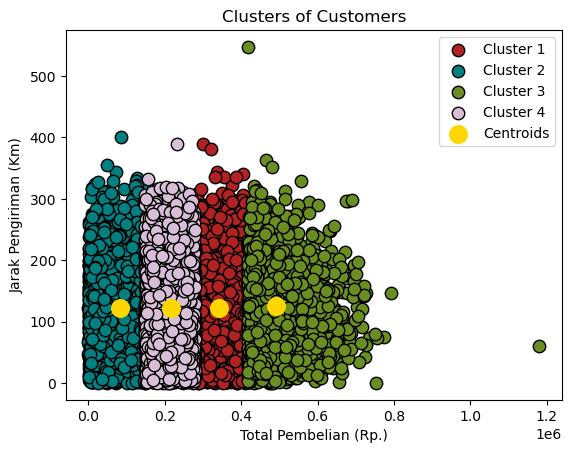

In [48]:
plt.scatter(ann_kmeans0, spend_kmeans0, s = 80, c = "firebrick", label = "Cluster 1", edgecolor='black')
plt.scatter(ann_kmeans1, spend_kmeans1, s = 80, c = "teal", label = "Cluster 2", edgecolor='black')
plt.scatter(ann_kmeans2, spend_kmeans2, s = 80, c = "olivedrab", label = "Cluster 3", edgecolor='black')
plt.scatter(ann_kmeans3, spend_kmeans3, s = 80, c = "thistle", label = "Cluster 4", edgecolor='black')

# Centroid
plt.scatter(centroid_cluster[:,0], centroid_cluster[:,1], s = 160, c = "gold", label = "Centroids")
plt.title("Clusters of Customers")
plt.xlabel("Total Pembelian (Rp.)")
plt.ylabel("Jarak Pengiriman (Km)")
plt.legend()
plt.show()

### INTERPRETASI CLUSTER
Cluster 1 (Warna Firebrick)
Pelanggan dalam cluster ini mencerminkan perilaku total pembelian yang cukup rendah dengan jarak pengiriman yang tidak terlalu jauh. Ini bisa mengindikasikan bahwa sebagian besar pelanggan cenderung melakukan pembelian kecil atau jarang, dan biasanya dalam jarak yang dekat. Hal ini mungkin menunjukkan bahwa pelanggan tersebut adalah pelanggan yang kurang aktif atau jarang melakukan pembelian. Strategi promosi yang mungkin bisa dilakukan ialah fokus pada wilayah lokal atau regional. Ini bisa meliputi promosi di toko fisik, pemasaran melalui acara lokal, atau penggunaan layanan pengiriman lokal untuk menarik pelanggan di wilayah tersebut.

Cluster 2 (Warna Teal)
Pelanggan dalam cluster ini mencerminkan perilaku total pembelian yang sangat rendah dengan jarak pengiriman yang tidak terlalu jauh pula. Ini dapat diartikan bahwa sebagian besar pelanggan cenderung melakukan pembelian yang kecil, dan jarak yang dekat. Bisa jadi pelanggan tersebut adalah pelanggan yang kurang aktif dalam melakukan pembelian. Strategi yang dapat dilakukan ialah lebih detail dalam segmentasi pasar, seperti memahami apa yang dibutuhkan oleh pembeli dalam kehidupan sehari-hari, atau harga yang tidak jauh berbeda dari tempat pelanggan tinggal.

Cluster 3 (Warna Olivedrab)
Pelanggan dalam cluster ini mencerminkan bahwa perilaku total pembelian yang menengah dengan jarak pengiriman yang tidak terlalu jauh. Ini dapat diartikan bahwa sebagian besar pelanggan cenderung melakukan pembelian dengan alasan tertentu, entah kebutuhan yang sifatnya mendesak, adanya penawaran diskon pada pengiriman, dan tingginya minat pada produk local. Strategi yang harus dilakukan ialah selalu melakukan evaluasi pelayanan pelanggan dan pengiriman, lalu memastikan bahwa pengiriman dilakukan dengan baik dan tanpa masalah di wilayah yang dekat dengan mereka guna meningkatkan kepuasan pelanggan.

Cluster 4 (Warna Thistle)
Pelanggan dalam cluster ini mencerminkan perilaku total pembelian yang rendah dengan jarak pengiriman yang tidak terlalu jauh. Ini bisa mengindikasikan bahwa sebagian besar pelanggan cenderung melakukan pembelian yang jarang, dan biasanya dalam jarak yang dekat. Ini pun bisa jadi bahwa pelanggan melakukan pembelian karena memprioritaskan kebutuhan dan pola pembelian rutin/harian. Solusi untuk permasalahan ini ialah bisa berfokus pada pengoptimalan stok produk lokal, peningkatan ketersediaan produk di area tertentu, atau pengembangan layanan pengiriman lokal yang lebih cepat.

In [49]:
DataPelanggan["cluster"]= kmeans.labels_
DataPelanggan.head()

,ID Pelanggan,Total Pembelian,Jarak Pengiriman,Total Pembelian Kategori,Jarak Pengiriman Kategori,cluster
0,1,458155.370274,164.020749,Q4,Q3,2
1,2,350723.696050,109.824801,Q3,Q2,0
2,3,77004.899089,118.240787,Q1,Q2,1
3,4,116982.307140,29.621374,Q1,Q1,1
4,5,260973.963072,166.402283,Q3,Q4,3


### 3.2 Pola Keputusan Pembelian

In [51]:
KeputusanPembelian.head()

,ID Pelanggan,Kualitas Produk,Kualitas Informasi Produk,Jenis Pengiriman,Ongkos Kirim,Rating,Metode Pembayaran,Status
0,1,Baik,Informasi Produk Tidak Jelas,Dalam Provinsi Jawa Barat,Gratis,Baik,Sistem Pembayaran Online,Tidak Membeli
1,2,Baik,Informasi Produk Tidak Jelas,Dalam Provinsi Jawa Barat,Gratis,Buruk,Sistem Pembayaran Online,Tidak Membeli
2,3,Baik,Informasi Produk Jelas,Dalam Provinsi Jawa Barat,Gratis,Baik,Sistem Pembayaran Online,Tidak Membeli
3,4,Baik,Informasi Produk Jelas,Dalam Provinsi Jawa Barat,Gratis,Baik,Sistem Pembayaran Online,Tidak Membeli
4,5,Baik,Informasi Produk Jelas,Dalam Provinsi Jawa Barat,Berbayar,Baik,Sistem Pembayaran Online,Tidak Membeli


In [79]:
# Mengubah kembali Data Kategori ke Numerik
KeputusanPembelian['Kualitas Produk'] = KeputusanPembelian['Kualitas Produk'].replace({'Buruk': 0, 'Baik': 1})
KeputusanPembelian['Kualitas Informasi Produk'] = KeputusanPembelian['Kualitas Informasi Produk'].replace(
    {'Informasi Produk Tidak Jelas': 0, 'Informasi Produk Jelas': 1})
KeputusanPembelian['Jenis Pengiriman'] = KeputusanPembelian['Jenis Pengiriman'].replace(
    {'Luar Provinsi Jawa Barat': 0, 'Dalam Provinsi Jawa Barat': 1})
KeputusanPembelian['Ongkos Kirim'] = KeputusanPembelian['Ongkos Kirim'].replace({'Gratis': 0, 'Berbayar': 1})
KeputusanPembelian['Rating'] = KeputusanPembelian['Rating'].replace({'Buruk': 0, 'Baik': 1})
KeputusanPembelian['Metode Pembayaran'] = KeputusanPembelian['Metode Pembayaran'].replace(
    {'Cash on Delivery (COD)': 0, 'Sistem Pembayaran Online': 1})

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [83]:
# Memisahkan variabel independen dan variabel dependen
X = KeputusanPembelian.drop(['ID Pelanggan', 'Status'], axis=1)
y = KeputusanPembelian['Status']

In [84]:
# Bagi data menjadi set pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [85]:
# Menampilkan data latihan x_train dan y_train
x_train
y_train

4834           Membeli
12171    Tidak Membeli
3502           Membeli
11546    Tidak Membeli
6950           Membeli
             ...      
905      Tidak Membeli
5192     Tidak Membeli
12172          Membeli
235            Membeli
13349          Membeli
Name: Status, Length: 10500, dtype: object

In [86]:
# Menampilkan data latihan x_test dan y_test
x_test
y_test

7576     Tidak Membeli
10509          Membeli
4253     Tidak Membeli
5150     Tidak Membeli
506      Tidak Membeli
             ...      
5682           Membeli
11109          Membeli
7443     Tidak Membeli
10077          Membeli
13653          Membeli
Name: Status, Length: 4500, dtype: object

In [87]:
print(x_train.dtypes)

Kualitas Produk              int64
Kualitas Informasi Produk    int64
Jenis Pengiriman             int64
Ongkos Kirim                 int64
Rating                       int64
Metode Pembayaran            int64
dtype: object


In [88]:
print(KeputusanPembelian.head())

   ID Pelanggan  Kualitas Produk  Kualitas Informasi Produk  Jenis Pengiriman  \
0             1                1                          0                 1   
1             2                1                          0                 1   
2             3                1                          1                 1   
3             4                1                          1                 1   
4             5                1                          1                 1   

   Ongkos Kirim  Rating  Metode Pembayaran         Status  
0             0       1                  1  Tidak Membeli  
1             0       0                  1  Tidak Membeli  
2             0       1                  1  Tidak Membeli  
3             0       1                  1  Tidak Membeli  
4             1       1                  1  Tidak Membeli  


In [89]:
# Buat objek pengklasifikasi pohon keputusan
CLF = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = 3, min_samples_leaf = 5)

In [90]:
# Latih pengklasifikasi
CLF.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [91]:
# Buat prediksi pada set uji
y_pred = CLF.predict(x_test)

In [92]:
# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.5044444444444445
Classification Report:
                precision    recall  f1-score   support

      Membeli       0.50      0.29      0.37      2241
Tidak Membeli       0.50      0.71      0.59      2259

     accuracy                           0.50      4500
    macro avg       0.50      0.50      0.48      4500
 weighted avg       0.50      0.50      0.48      4500



In [93]:
# Leaf
target = list(KeputusanPembelian['Status'].unique())
target

['Tidak Membeli', 'Membeli']

In [94]:
# Decision Node
features_names = list(X.columns)
features_names

['Kualitas Produk',
 'Kualitas Informasi Produk',
 'Jenis Pengiriman',
 'Ongkos Kirim',
 'Rating',
 'Metode Pembayaran']

In [95]:
# VERSI TEXT DARI DECISION TREE #
from sklearn.tree import export_text
r = export_text(CLF, feature_names = features_names)
print(r)

|--- Kualitas Produk <= 0.50
|   |--- Metode Pembayaran <= 0.50
|   |   |--- Kualitas Informasi Produk <= 0.50
|   |   |   |--- class: Membeli
|   |   |--- Kualitas Informasi Produk >  0.50
|   |   |   |--- class: Tidak Membeli
|   |--- Metode Pembayaran >  0.50
|   |   |--- Ongkos Kirim <= 0.50
|   |   |   |--- class: Tidak Membeli
|   |   |--- Ongkos Kirim >  0.50
|   |   |   |--- class: Membeli
|--- Kualitas Produk >  0.50
|   |--- Rating <= 0.50
|   |   |--- Metode Pembayaran <= 0.50
|   |   |   |--- class: Membeli
|   |   |--- Metode Pembayaran >  0.50
|   |   |   |--- class: Tidak Membeli
|   |--- Rating >  0.50
|   |   |--- Jenis Pengiriman <= 0.50
|   |   |   |--- class: Tidak Membeli
|   |   |--- Jenis Pengiriman >  0.50
|   |   |   |--- class: Membeli



### INTERPRETASI HASIL
Dalam penafsiran pohon keputusan, kita menelaah aturan-aturan yang diterapkan pada kumpulan data. Setiap percabangan dan simpul daun pada pohon mewakili suatu keputusan yang berdasarkan pada karakteristik-karakteristik tertentu dari data. Mari kita melakukan interpretasi terhadap setiap percabangan dan simpul daun ini untuk memahami signifikansinya.

Kualitas Produk <= 0.50
Jika kualitas produk kurang atau sama dengan 0.50, maka: 
1. Jika metode pembayaran kurang atau sama dengan 0.50, dan kualitas informasi produk kurang atau sama dengan 0.50, maka hasilnya adalah kelas 1 (Membeli Produk). 
2. Jika metode pembayaran lebih dari 0.50, dan kualitas informasi produk kurang atau sama dengan 0.50, maka hasilnya adalah kelas 0 (Tidak Membeli Produk). 
3. Jika metode pembayaran lebih dari 0.50, dan ongkos kirim kurang atau sama dengan 0.50 maka hasilnya adalah kelas 0 (Tidak Membeli Produk).
4. Jika metode pembayaran lebih dari 0.50, dan ongkos kirim lebih lebih dari 0.50 maka hasilnya adalah kelas 0 (Tidak Membeli Produk).

Kualitas Produk > 0.50
Jika kualitas produk lebih dari 0.50, maka: 
1. Jika rating kurang atau sama dengan 0.50, dan metode pembayaran kurang atau sama dengan 0.50, maka hasilnya adalah kelas 1 (Membeli Produk). 
2. Jika rating kurang atau sama dengan 0.50, dan metode pembayaran lebih dari 0.50, maka hasilnya adalah kelas 0 (Tidak Membeli Produk). 
3. Jika rating lebih dari 0.50, dan jenis pengiriman kurang atau sama dengan 0.50 maka hasilnya adalah kelas 0 (Tidak Membeli Produk).
4. Jika rating lebih dari 0.50, dan jenis pengiriman lebih lebih dari 0.50 maka hasilnya adalah kelas 1 (Membeli Produk).

### 3.3 Transaksi Pembelian Produk

In [66]:
TransaksiPembelian.head()

,Jeans,T-Shirt,Jaket,Sweater,Kemeja,Blouse,Batik,Rok,Topi,Tas,Dompet,Blazer,Jas,Dress,Celana Bahan,Dasi,Sabuk
0,Tidak Membeli,Membeli,Tidak Membeli,Membeli,Membeli,Membeli,Tidak Membeli,Membeli,Membeli,Tidak Membeli,Tidak Membeli,Tidak Membeli,Tidak Membeli,Tidak Membeli,Membeli,Tidak Membeli,Tidak Membeli
1,Tidak Membeli,Membeli,Tidak Membeli,Tidak Membeli,Membeli,Tidak Membeli,Tidak Membeli,Membeli,Tidak Membeli,Tidak Membeli,Membeli,Tidak Membeli,Membeli,Membeli,Tidak Membeli,Membeli,Tidak Membeli
2,Membeli,Tidak Membeli,Membeli,Tidak Membeli,Membeli,Tidak Membeli,Membeli,Tidak Membeli,Membeli,Membeli,Tidak Membeli,Tidak Membeli,Membeli,Tidak Membeli,Membeli,Tidak Membeli,Tidak Membeli
3,Membeli,Tidak Membeli,Membeli,Tidak Membeli,Tidak Membeli,Membeli,Tidak Membeli,Membeli,Membeli,Membeli,Tidak Membeli,Membeli,Tidak Membeli,Membeli,Tidak Membeli,Membeli,Tidak Membeli
4,Tidak Membeli,Tidak Membeli,Membeli,Membeli,Membeli,Tidak Membeli,Membeli,Tidak Membeli,Membeli,Membeli,Membeli,Membeli,Membeli,Membeli,Membeli,Tidak Membeli,Membeli


In [67]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [68]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [69]:
TransaksiPembelian.shape

(20000, 17)

In [71]:
TransaksiPembelian = TransaksiPembelian.replace({"Membeli": 1, "Tidak Membeli": 0})

# Mencari itemset yang sering muncul (support >= 0.3)
frequent_itemsets = apriori(TransaksiPembelian, min_support = 0.3, use_colnames = True)
frequent_itemsets

C:\Users\User\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.60010,(Jeans)
1,0.60265,(T-Shirt)
2,0.60055,(Jaket)
3,0.59800,(Sweater)
4,0.60465,(Kemeja)
...,...,...
148,0.36140,"(Dasi, Dress)"
149,0.36070,"(Dress, Sabuk)"
150,0.36290,"(Dasi, Celana Bahan)"
151,0.36175,"(Sabuk, Celana Bahan)"


In [72]:
# Mencari aturan asosiasi dengan confidence >= 0.5
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Jeans),(T-Shirt),0.60010,0.60265,0.36255,0.604149,1.002488,0.000900,1.003788,0.006206
1,(T-Shirt),(Jeans),0.60265,0.60010,0.36255,0.601593,1.002488,0.000900,1.003747,0.006246
2,(Jeans),(Jaket),0.60010,0.60055,0.35970,0.599400,0.998085,-0.000690,0.997130,-0.004774
3,(Jaket),(Jeans),0.60055,0.60010,0.35970,0.598951,0.998085,-0.000690,0.997135,-0.004780
4,(Jeans),(Sweater),0.60010,0.59800,0.35810,0.596734,0.997883,-0.000760,0.996860,-0.005278
...,...,...,...,...,...,...,...,...,...,...
267,(Celana Bahan),(Dasi),0.60725,0.59515,0.36290,0.597612,1.004137,0.001495,1.006119,0.010490
268,(Sabuk),(Celana Bahan),0.59265,0.60725,0.36175,0.610394,1.005177,0.001863,1.008070,0.012645
269,(Celana Bahan),(Sabuk),0.60725,0.59265,0.36175,0.595718,1.005177,0.001863,1.007590,0.013115
270,(Dasi),(Sabuk),0.59515,0.59265,0.35230,0.591952,0.998822,-0.000416,0.998288,-0.002906


In [73]:
# Menampilkan hasil
print("Pola Pembelian dengan Support >= 0.3 dan Confidence >= 0.5:")
print(rules)

txns = TransaksiPembelian.values.reshape(-1).tolist()
df_list = pd.DataFrame(txns)
df_list['Count'] = 1
df_list = df_list.groupby(by = [0], 
        as_index = False).count().sort_values(by = ['Count'], ascending =True)
df_list['Percentage'] = (df_list['Count'] / df_list['Count'].sum())
df_list = df_list.rename(columns = {0 : 'Item'})
df_list

Pola Pembelian dengan Support >= 0.3 dan Confidence >= 0.5:
        antecedents     consequents  antecedent support  consequent support  \
0           (Jeans)       (T-Shirt)             0.60010             0.60265   
1         (T-Shirt)         (Jeans)             0.60265             0.60010   
2           (Jeans)         (Jaket)             0.60010             0.60055   
3           (Jaket)         (Jeans)             0.60055             0.60010   
4           (Jeans)       (Sweater)             0.60010             0.59800   
..              ...             ...                 ...                 ...   
267  (Celana Bahan)          (Dasi)             0.60725             0.59515   
268         (Sabuk)  (Celana Bahan)             0.59265             0.60725   
269  (Celana Bahan)         (Sabuk)             0.60725             0.59265   
270          (Dasi)         (Sabuk)             0.59515             0.59265   
271         (Sabuk)          (Dasi)             0.59265             0.5

,Item,Count,Percentage
0,0,136068,0.4002
1,1,203932,0.5998


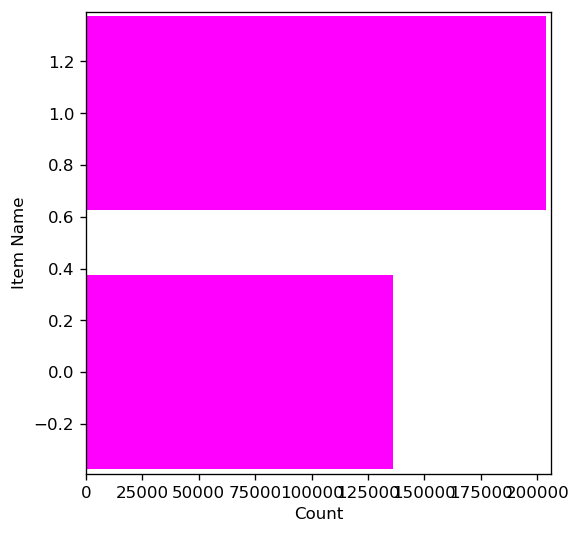

In [77]:
# Mmebuat Diagram Batang
plt.figure(figsize = (5,5), dpi = 120)
plt.ylabel('Item Name')
plt.xlabel('Count')
plt.barh(df_list['Item'], width = df_list['Count'], color = "magenta", height = 0.75)
plt.margins(0.01)
plt.show()

### INTERPRETASI HASIL
Dalam konteks Association Rule Mining seperti yang digunakan dalam algoritma Apriori, "antecedent" merujuk pada bagian pertama dari suatu aturan asosiasi. Ini adalah item atau kelompok item yang dianggap sebagai penyebab atau kondisi yang memicu atau mendahului item lain yang disebut "consequent" dalam aturan asosiasi. Secara umum, jika kita memiliki aturan asosiasi dalam bentuk "A → B", maka "A" adalah antecedent dan "B" adalah consequent.
Misalnya, jika kita melakukan analisis pembelian konsumen, kita mungkin menemukan aturan asosiasi seperti "T-Shirt → Jeans". Di sini, "T-Shirt" adalah antecedent, sementara "Jeans" adalah consequent. Aturan ini menyatakan bahwa ketika konsumen membeli T-Shirt, mereka cenderung juga membeli Jeans.
1. Antecedent Support : Proporsi dari transaksi atau itemset yang mengandung antecedent (item atau kelompok item pertama dalam aturan asosiasi).
2. Consequent Support : Proporsi dari transaksi atau itemset yang mengandung consequent (item atau kelompok item kedua dalam aturan asosiasi).
3. Confidence: (0.601593) = Seberapa sering pelanggan membeli (Jeans) ketika mereka sudah membeli "T-Shirt". 
4. Lift: (1.002488) = Penggandaan peluang pembelian (Jeans) ketika pelanggan sudah membeli "TShirt". 
5. Leverage: (0.000900) = Seberapa banyak pembelian (Jeans) yang terjadi bersamaan dengan pembelian "T-Shirt" dibandingkan dengan apa yang diharapkan jika pembelian itu bersifat independen. 
6. Conviction: (1.003747) = Mengukur seberapa "bergantung" pelanggan pada pembelian "T-Shirt" untuk membeli (Jeans). Sebuah nilai tak terhingga berarti ketergantungan yang kuat.